# install dependencies

In [1]:
!pip3 install inverse-canopy==0.0.21

# **Model Inputs**

In [2]:
from inverse_canopy import InverseCanopy
import tensorflow as tf
import numpy as np

tunable initialized: dtype=<dtype: 'float64'>, epsilon=1e-20
learning_rate: 0.05,patience: 50,min_improvement: 0.001,max_steps: 5000,seed: 372
Step 0: Loss = 17.1973813678016363, performing 114.7 it/sec
Step 100: Loss = 10.0182847631503869, performing 63.3 it/sec
Step 200: Loss = 4.0159453737350210, performing 60.7 it/sec
Step 300: Loss = 0.2542998057539505, performing 68.2 it/sec
Step 400: Loss = 0.0139373403209618, performing 74.1 it/sec
No improvement since Step 427, early stopping.
[Best]  Step 426: Loss = 0.0025964136973612
[Final] Step 476: Loss = 0.0034455580107165

predicted end states
-------------------------------------
          5th       Mean      95th
EVTR-1   8.86e-05  8.86e-05  8.86e-05
EVTR-2   4.03e-06  4.03e-06  4.03e-06
EVTR-3   4.09e-08  4.09e-08  4.09e-08
EVTR-4   4.11e-10  4.11e-10  4.11e-10
EVTR-5   1.48e-08  1.48e-08  1.48e-08
EVTR-6   1.47e-11  1.47e-11  1.47e-11
EVTR-7   7.07e-06  7.07e-06  7.07e-06
EVTR-8   6.99e-08  6.99e-08  6.99e-08
EVTR-9   6.94e-10  6.9

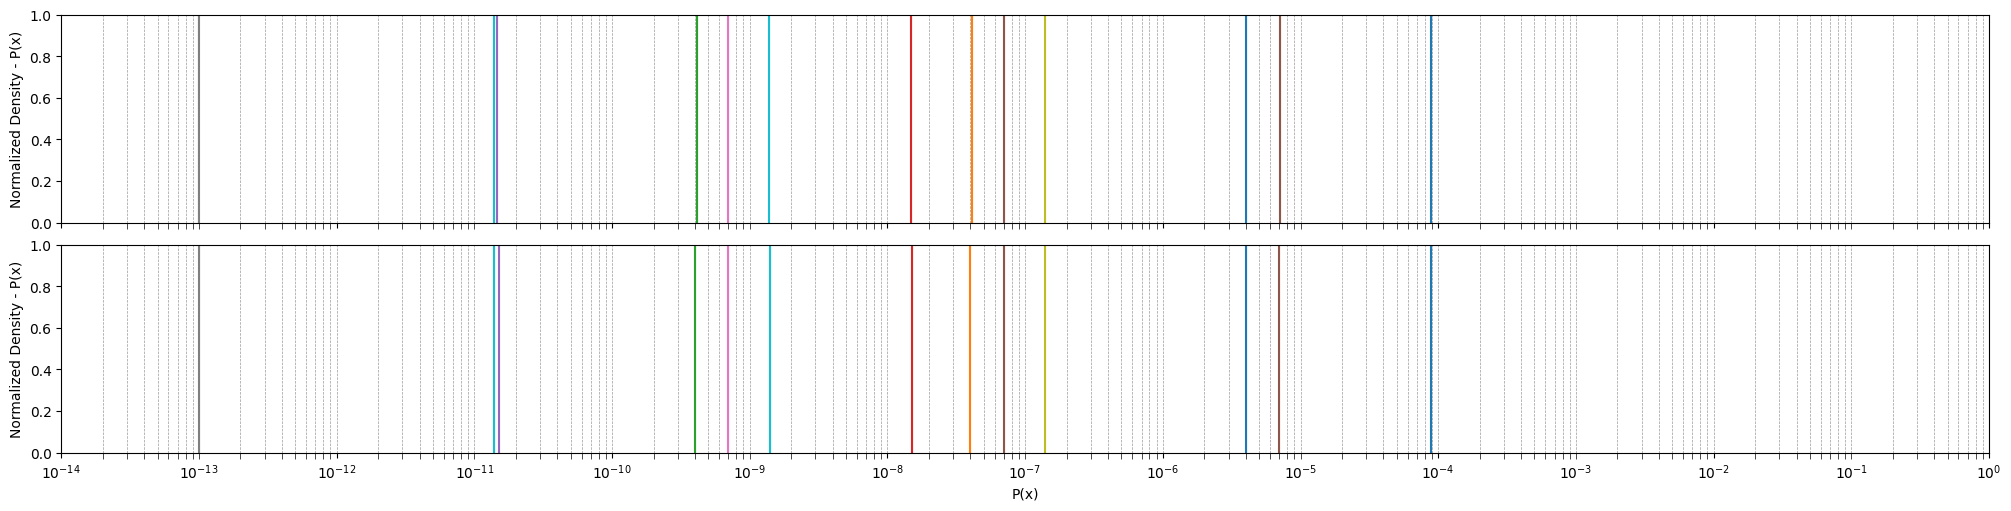

In [5]:
tunable = {
 'num_samples': 1000,      # number of monte carlo samples
 'learning_rate': 0.05,    # the gradient update rate
 'dtype': tf.float64,     # use 64-bit floats
 'epsilon': 1e-20,        # useful for avoiding log(0 + epsilon) type errors
 'max_steps': 5000,       # maximum steps, regardless of convergence
 'patience': 50,          # number of steps to wait before early stopping if the loss does not improve
 'initiating_event_frequency': 1e-4,  # set the initiating event (IE) frequency here
 'freeze_initiating_event': True,       # set to False if you'd like to predict the IE frequency as well
}

conditional_events = {
    'names': ['EVTR', 'FSDG', 'SMLK', 'LKDT', 'SPRS|~LKDT', 'SPRS|LKDT', 'SPRS|SMLK', 'SPRS |FSDG','DUME','PRRE | SMLK','PRRE | FSDG','RIHX | ~SMLK','RIHX | ~SMLK'],
    'bounds': {
        'mean': {
            'min': 1e-14,
            'max': 1.00,
        },
        'std': {
            'min': 1e-10,
            'max': 1e8,
        },
     },
    'initial': {
       'mean': 5e-1,
       'std': 1e8,
    }
}

end_states = {
    'EVTR-1': {
        'sequence': [1, 0, 0, 0, 0, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
        'probability': 8.87e-5,
    },
    'EVTR-2': {
        'sequence': [1, 0, 0, 0, 1, np.nan, np.nan, np.nan, 0, np.nan, np.nan, np.nan, np.nan],
        'probability': 4e-6,
    },
    'EVTR-3': {
        'sequence': [1, 0, 0, 0, 1, np.nan, np.nan, np.nan, 1, np.nan, np.nan, 0, np.nan],
        'probability': 4e-8,  # frequency unknown
    },
    'EVTR-4': {
        'sequence': [1, 0, 0, 0, 1, np.nan, np.nan, np.nan, 1, np.nan, np.nan, 1, np.nan],
        'probability': 4e-10,
    },
    'EVTR-5': {
        'sequence': [1, 0, 0, 1, np.nan, 0, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
        'probability': 1.5e-8,
    },
    'EVTR-6': {
        'sequence': [1, 0, 0, 1, np.nan, 1, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
        'probability': 1.5e-11,
    },
    'EVTR-7': {
        'sequence': [1, 0, 1, np.nan, np.nan, np.nan, 0, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
        'probability': 7e-6,
    },
    'EVTR-8': {
        'sequence': [1, 0, 1, np.nan, np.nan, np.nan, 1, np.nan, np.nan, 0, np.nan, np.nan, np.nan],
        'probability': 7e-8,
    },
    'EVTR-9': {
        'sequence': [1, 0, 1, np.nan, np.nan, np.nan, 1, np.nan, np.nan, 1, np.nan, np.nan, 0],
        'probability': 7e-10,
    },
    'EVTR-10': {
        'sequence': [1, 0, 1, np.nan, np.nan, np.nan, 1, np.nan, np.nan, 1, np.nan, np.nan, 1],
        'probability': 1e-13,
    },
     'EVTR-11': {
        'sequence': [1, 1, np.nan, np.nan, np.nan, np.nan, np.nan, 0, np.nan, np.nan, np.nan, np.nan, np.nan],
        'probability': 1.4e-7,
    },
    'EVTR-12': {
        'sequence': [1, 1, np.nan, np.nan, np.nan, np.nan, np.nan, 1, np.nan, np.nan, 0, np.nan, np.nan],
        'probability': 1.4e-9,
    },
    'EVTR-13': {
        'sequence': [1, 1, np.nan, np.nan, np.nan, np.nan, np.nan, 1, np.nan, np.nan, 1, np.nan, np.nan],
        'probability': 1.4e-11,
    },
}

model = InverseCanopy(conditional_events, end_states, tunable)
model.fit(steps=tunable['max_steps'], patience=tunable['patience'], learning_rate=tunable['learning_rate'])
model.summarize(show_plot=True, show_metrics=False)